<a href="https://colab.research.google.com/github/richmis/mini-project-repository/blob/main/merged_code_with_prediction_and_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel("/content/final dataset for recommendation.xlsx")
df.head(5)
#df_filled = df.fillna(value=0)

,GENDER,MONTH,HEIGHT (cm),WEIGHT(kg),MALNUTRITION TYPE,RECOMMENDATIONS,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,BOY,0.1,45.0,1.7,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOY,0.5,45.5,1.7,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BOY,0.7,45.7,1.7,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOY,0.9,45.9,1.8,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOY,1.0,46.0,1.8,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['GENDER', 'MONTH', 'HEIGHT (cm)', 'WEIGHT(kg)', 'MALNUTRITION TYPE'], dtype='object')

In [ ]:
# Remove leading and trailing spaces from 'MALNUTRITION TYPE' column
df_filled['MALNUTRITION TYPE'] = df_filled['MALNUTRITION TYPE'].str.strip()

# Now you can use LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Encode 'MALNUTRITION TYPE' column
df_filled['MALNUTRITION TYPE'] = le.fit_transform(df_filled['MALNUTRITION TYPE'])

# Adding 1 to shift the encoded values by 1
df_filled['MALNUTRITION TYPE'] += 1

# Print the DataFrame
print(df_filled)


     GENDER  MONTH  HEIGHT (cm)  WEIGHT(kg)  MALNUTRITION TYPE
0       BOY    0.1         45.0         1.7                  4
1       BOY    0.5         45.5         1.7                  4
2       BOY    0.7         45.7         1.7                  4
3       BOY    0.9         45.9         1.8                  4
4       BOY    1.0         46.0         1.8                  4
...     ...    ...          ...         ...                ...
4650   GIRL   60.0        119.4        21.2                  2
4651   GIRL   60.0        119.6        21.2                  2
4652   GIRL   60.0        119.8        21.2                  2
4653   GIRL   60.0        119.9        21.2                  2
4654   GIRL   60.0        120.0        21.2                  2

[4655 rows x 5 columns]


In [ ]:

df_filled['GENDER'] = df_filled['GENDER'].str.strip()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_filled['GENDER'] = le.fit_transform(df_filled['GENDER'])

df_filled['GENDER'] += 1

print(df_filled)

      GENDER  MONTH  HEIGHT (cm)  WEIGHT(kg)  MALNUTRITION TYPE
0          1    0.1         45.0         1.7                  4
1          1    0.5         45.5         1.7                  4
2          1    0.7         45.7         1.7                  4
3          1    0.9         45.9         1.8                  4
4          1    1.0         46.0         1.8                  4
...      ...    ...          ...         ...                ...
4650       2   60.0        119.4        21.2                  2
4651       2   60.0        119.6        21.2                  2
4652       2   60.0        119.8        21.2                  2
4653       2   60.0        119.9        21.2                  2
4654       2   60.0        120.0        21.2                  2

[4655 rows x 5 columns]


In [ ]:
inputs = df_filled.drop(['MALNUTRITION TYPE'], axis='columns')
inputs

,GENDER,MONTH,HEIGHT (cm),WEIGHT(kg)
0,1,0.1,45.0,1.7
1,1,0.5,45.5,1.7
2,1,0.7,45.7,1.7
3,1,0.9,45.9,1.8
4,1,1.0,46.0,1.8
...,...,...,...,...
4650,2,60.0,119.4,21.2
4651,2,60.0,119.6,21.2
4652,2,60.0,119.8,21.2
4653,2,60.0,119.9,21.2


In [ ]:
df_filled.head(4030)

,GENDER,MONTH,HEIGHT (cm),WEIGHT(kg),MALNUTRITION TYPE
0,1,0.1,45.0,1.7,4
1,1,0.5,45.5,1.7,4
2,1,0.7,45.7,1.7,4
3,1,0.9,45.9,1.8,4
4,1,1.0,46.0,1.8,4
...,...,...,...,...,...
4025,1,24.0,69.0,12.2,2
4026,1,24.3,69.3,12.2,2
4027,1,24.5,69.5,12.3,2
4028,1,24.7,69.7,12.3,2


In [ ]:
target = (['MALNUTRITION TYPE'])

In [ ]:
selected_data = df_filled[target]

# Print dataset values for the selected columns
print(selected_data)

      MALNUTRITION TYPE
0                     4
1                     4
2                     4
3                     4
4                     4
...                 ...
4650                  2
4651                  2
4652                  2
4653                  2
4654                  2

[4655 rows x 1 columns]


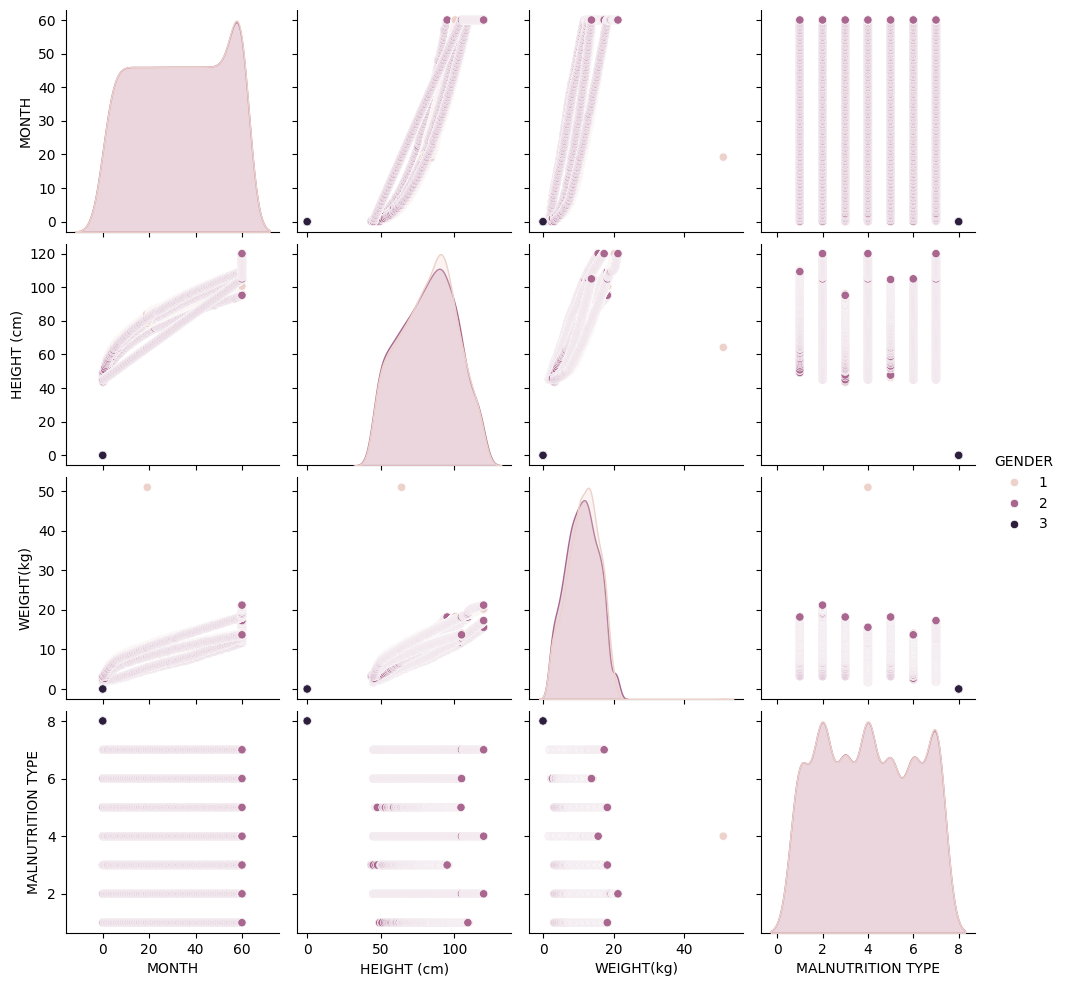

In [ ]:
import seaborn as sns

# Assuming 'gender_n' is the encoded column name
sns.pairplot(df_filled, hue='GENDER')

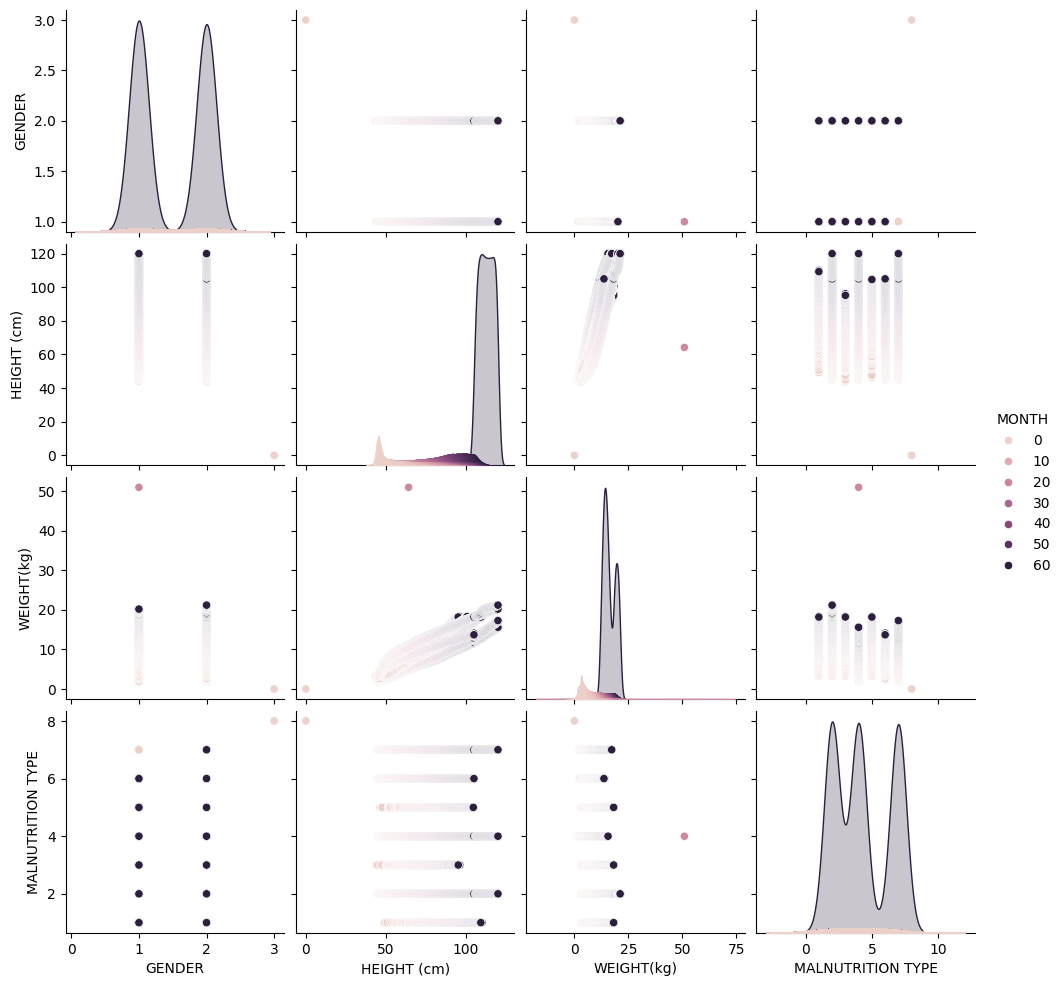

In [ ]:
import seaborn as sns

sns.pairplot(df_filled, hue='MONTH')

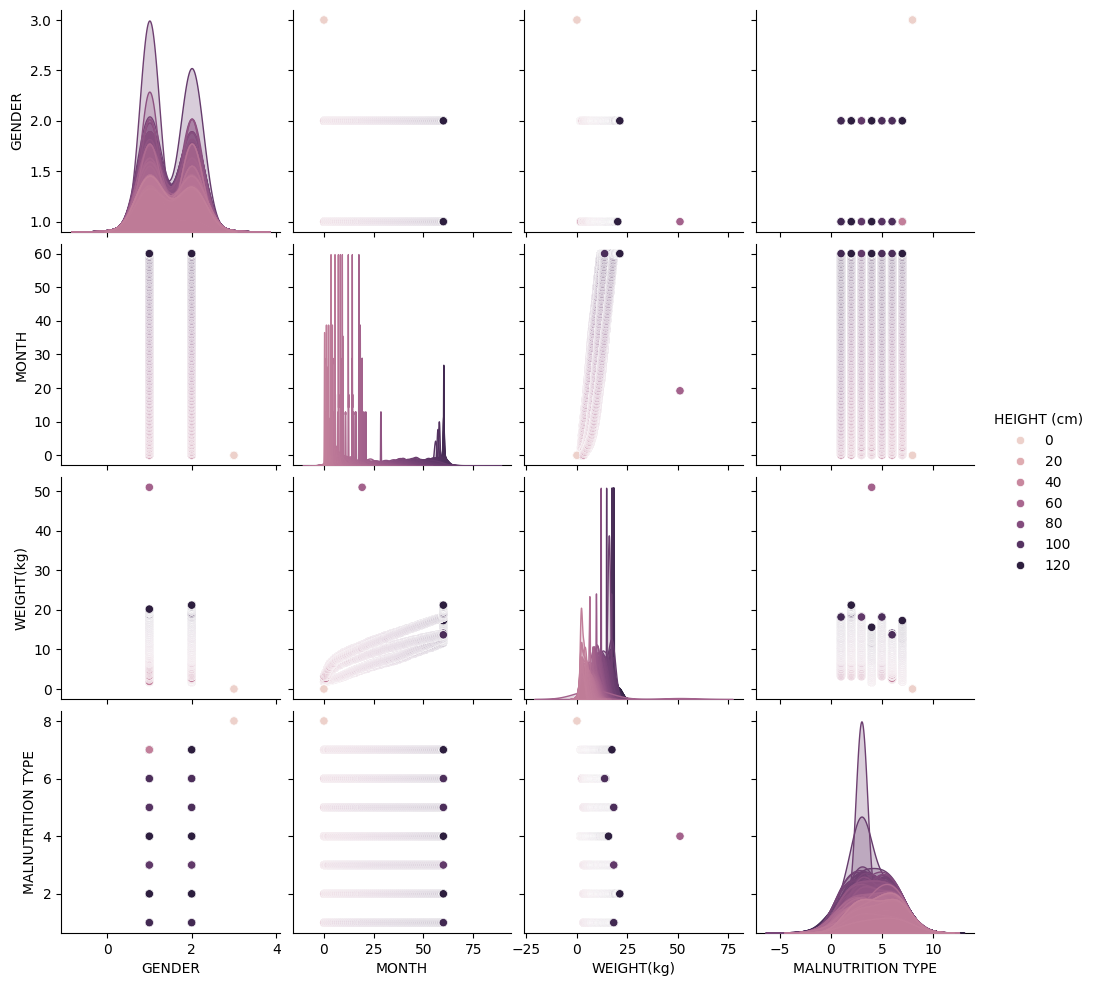

In [ ]:

sns.pairplot(df_filled, hue='HEIGHT (cm)')

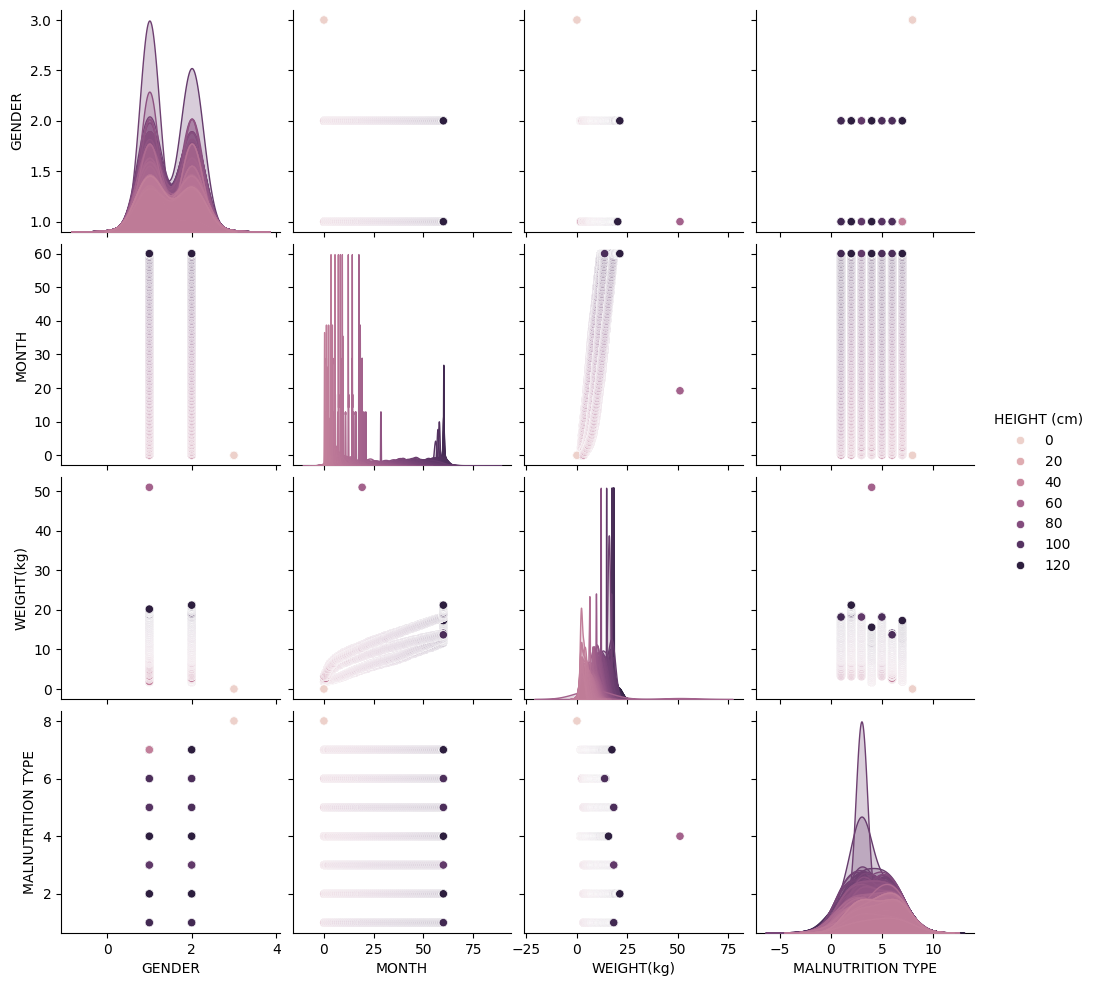

In [ ]:

sns.pairplot(df_filled, hue='HEIGHT (cm)')

In [ ]:
import numpy as np
selected_data_array = np.array(target)
print("Shape of target:", selected_data_array.shape)
inputs_array = np.array(inputs)
print("Shape of inputs:", inputs_array.shape)

Shape of target: (1,)
Shape of inputs: (4655, 4)


In [ ]:
pip install scikit-learn==1.3.0


In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split with the actual target values
X_train, X_test, y_train, y_test = train_test_split(inputs, selected_data, test_size=0.2, random_state=42)

# Output the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3724, 4)
Shape of X_test: (931, 4)
Shape of y_train: (3724, 1)
Shape of y_test: (931, 1)


In [ ]:
X_test

,GENDER,MONTH,HEIGHT (cm),WEIGHT(kg)
1614,1,23.0,78.0,12.0
1181,2,11.3,56.2,3.8
2178,1,15.5,74.5,10.3
3528,1,45.0,90.0,12.4
633,2,51.7,96.6,10.1
...,...,...,...,...
3277,2,55.0,106.6,17.3
1420,2,59.0,104.0,12.6
1533,1,6.9,62.4,8.2
517,2,28.5,73.4,6.2


In [ ]:
len(X_test)

931

In [ ]:
len(X_train)

3724

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
model.score(X_train, y_train)

0.9910780780195871

In [ ]:

import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)


In [ ]:
import numpy as np


input_data = np.array([1,18.3,74.4,10.9]).reshape(1, -1)  # Reshape the input data if necessary
predictions = model.predict(input_data)  # Make predictions

print(predictions)  # Print the predictions


[3.24]


In [ ]:
def classify_nutritional_status(predictions):
    if predictions >= 2.8 and predictions <= 3.7:
        return "SEVERESTUNTING"
    elif predictions >= 4.8 and predictions <= 5.7:
        return "STUNTING"
    elif predictions >= 3.8 and predictions <= 4.7:
        return "SEVEREWASTING"
    elif predictions >= 6.8 and predictions <= 7.7:
        return "WASTING"
    elif predictions >= 5.8 and predictions <= 6.7:
        return "UNDERWEIGHT"
    elif predictions == 1:
        return "HEALTHYHEIGHT"
    elif predictions >= 1.8 and predictions <= 2.7:
        return "HEALTHYHEIGHT"

status = classify_nutritional_status(predictions)
print(status)  # This will print "Severe stunting" for the given value of predictions



SEVERESTUNTING


In [ ]:
df=pd.read_excel('/content/final dataset for recommendation.xlsx')

In [ ]:
df.head()

,GENDER,MONTH,HEIGHT (cm),WEIGHT(kg),MALNUTRITION TYPE,RECOMMENDATIONS,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,BOY,0.1,45.0,1.7,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOY,0.5,45.5,1.7,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BOY,0.7,45.7,1.7,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOY,0.9,45.9,1.8,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOY,1.0,46.0,1.8,SEVERE WASTING (kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns


Index(['GENDER', 'MONTH', 'HEIGHT (cm)', 'WEIGHT(kg)', 'MALNUTRITION TYPE',
       'RECOMMENDATIONS', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.duplicated().sum()

1

In [ ]:
duplicate_rows = df.duplicated()

# Print the DataFrame with duplicate rows marked
print(df[duplicate_rows])

     GENDER  MONTH  HEIGHT (cm)  WEIGHT(kg) MALNUTRITION TYPE  \
1124    BOY    0.1         45.0         1.9      WASTING (kg)   

                                        RECOMMENDATIONS Unnamed: 6  \
1124  Twelve weeks growth monitoring (every week) un...        NaN   

      Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 23  Unnamed: 24  \
1124         NaN         NaN         NaN  ...          NaN          NaN   

      Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  \
1124          NaN          NaN          NaN          NaN          NaN   

      Unnamed: 30  Unnamed: 31  Unnamed: 32  
1124          NaN          NaN          NaN  

[1 rows x 33 columns]


In [ ]:
df.RECOMMENDATIONS[1]   #its a string

'the child is admitted in NRC (ntrition rehabiliation centres) affiliated by government for 14days untill the weight grade increases, seek medical attention promptly,Provide specialized therapeutic foods,Promote Breastfeeding,Improve Sanitation and Hygiene'

In [ ]:
df['MALNUTRITION TYPE'] = df['MALNUTRITION TYPE'].str.replace(' ', '')
# removingspaces from strings in order to avoid ambiguity !!!

In [ ]:
df['MONTH'] = df['MONTH'].astype(str)
df['HEIGHT (cm)'] = df['HEIGHT (cm)'].astype(str)
df['WEIGHT(kg)'] = df['WEIGHT(kg)'].astype(str)

In [ ]:
df['TAGS']=df['GENDER'] + df['MONTH'] + df['HEIGHT (cm)'] + df['WEIGHT(kg)']

In [ ]:
df.head(5)

,GENDER,MONTH,HEIGHT (cm),WEIGHT(kg),MALNUTRITION TYPE,RECOMMENDATIONS,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,TAGS
0,BOY,0.1,45.0,1.7,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOY0.145.01.7
1,BOY,0.5,45.5,1.7,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOY0.545.51.7
2,BOY,0.7,45.7,1.7,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOY0.745.71.7
3,BOY,0.9,45.9,1.8,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOY0.945.91.8
4,BOY,1.0,46.0,1.8,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOY1.046.01.8


In [ ]:
new_df=df[['MALNUTRITION TYPE','RECOMMENDATIONS','TAGS']]

In [ ]:
new_df.head(2500)

,MALNUTRITION TYPE,RECOMMENDATIONS,TAGS
0,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,BOY0.145.01.7
1,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,BOY0.545.51.7
2,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,BOY0.745.71.7
3,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,BOY0.945.91.8
4,SEVEREWASTING(kg),the child is admitted in NRC (ntrition rehabil...,BOY1.046.01.8
...,...,...,...
2495,STUNTING,give life-saving food and proper care to the c...,GIRL19.579.010.5
2496,STUNTING,give life-saving food and proper care to the c...,GIRL19.779.310.6
2497,STUNTING,give life-saving food and proper care to the c...,GIRL19.979.510.7
2498,STUNTING,give life-saving food and proper care to the c...,GIRL20.079.610.7


In [ ]:
new_df['TAGS']

0           BOY0.145.01.7
1           BOY0.545.51.7
2           BOY0.745.71.7
3           BOY0.945.91.8
4           BOY1.046.01.8
              ...        
4645    GIRL60.0119.421.2
4646    GIRL60.0119.621.2
4647    GIRL60.0119.821.2
4648    GIRL60.0119.921.2
4649    GIRL60.0120.021.2
Name: TAGS, Length: 4650, dtype: object

In [ ]:
new_df['TAGS'][3]

'BOY0.945.91.8'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'new_df' is your DataFrame and 'TAGS' is the column containing text data
# Convert non-string values to empty strings using .loc to avoid the warning
new_df.loc[:, 'TAGS'] = new_df['TAGS'].apply(lambda x: str(x) if isinstance(x, str) else '')

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the text data
vectors = cv.fit_transform(new_df['TAGS']).toarray()


<ipython-input-39-ee15bcb7dce8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'TAGS'] = new_df['TAGS'].apply(lambda x: str(x) if isinstance(x, str) else '')


In [ ]:
vectors

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
feature_names = cv.get_feature_names_out()
feature_names

array(['01', '010', '0100', '0101', '0102', '0103', '0104', '0105',
       '0106', '0107', '0108', '0109', '011', '0110', '0111', '0112',
       '0113', '0114', '0115', '0116', '0117', '0118', '0119', '012',
       '0120', '013', '014', '015', '016', '017', '018', '019', '02',
       '020', '021', '03', '04', '045', '046', '047', '048', '049', '05',
       '050', '051', '052', '053', '054', '055', '056', '057', '058',
       '059', '06', '060', '061', '062', '063', '064', '065', '066',
       '067', '068', '069', '07', '070', '071', '072', '073', '074',
       '075', '076', '077', '078', '079', '08', '080', '081', '082',
       '083', '084', '085', '086', '087', '088', '089', '09', '090',
       '091', '092', '093', '094', '095', '096', '097', '098', '099',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '13', '14', '143', '144', '145', '146', '147', '149', '15', '151',
       '16', '17', '18', '19', '21', '210', '211', '212', '213', '214',
       '215', '2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
similarity=cosine_similarity(vectors)

In [ ]:
similarity.shape

(4650, 4650)

In [ ]:
similarity

array([[1.        , 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.66666667, 1.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.33333333,
        1.        ]])

In [ ]:
similarity[0]     #its coming right!!!

array([1.        , 0.33333333, 0.33333333, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:3]

[(749, 1.0000000000000002), (1124, 1.0000000000000002)]

In [ ]:
def recommend(typeofmalnutri):
    malnutrition_index=new_df[new_df['MALNUTRITION TYPE']==typeofmalnutri].index[0]
    distances=similarity[malnutrition_index]
    listi=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:3]

    for i in listi:
        print(new_df.iloc[i[0]].RECOMMENDATIONS)


In [ ]:
recommend(status)

Nutrition education for pregnant women,Micronutrient or macronutrient supplementation in children,iron and vit A supplementation and deworming in children, weight and height should be checked every month
give life-saving food and proper care to the child,nutritious food during pregnancy and lactation,Advocate for policies and programs that prioritize nutrition,Promote Breastfeeding


In [ ]:
# saving the trained model
import pickle


In [ ]:
filename="trained_model.sav"
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data = np.array([1,18.3,74.4,10.9]).reshape(1, -1)  # Reshape the input data if necessary
predictions = model.predict(input_data)  # Make predictions

print(predictions)  # Print the predictions
def classify_nutritional_status(predictions):
    if predictions >= 2.8 and predictions <= 3.7:
        return "SEVERESTUNTING"
    elif predictions >= 4.8 and predictions <= 5.7:
        return "STUNTING"
    elif predictions >= 3.8 and predictions <= 4.7:
        return "SEVEREWASTING"
    elif predictions >= 6.8 and predictions <= 7.7:
        return "WASTING"
    elif predictions >= 5.8 and predictions <= 6.7:
        return "UNDERWEIGHT"
    elif predictions == 1:
        return "HEALTHYHEIGHT"
    elif predictions >= 1.8 and predictions <= 2.7:
        return "HEALTHYHEIGHT"

status = classify_nutritional_status(predictions)
print(status)  # This will print "Severe stunting" for the given value of predictions



[3.24]
SEVERESTUNTING


In [ ]:
pickle.dump(new_df,open('recommendations.pkl','wb'))

In [ ]:
new_df['MALNUTRITION TYPE']

0       SEVEREWASTING(kg)
1       SEVEREWASTING(kg)
2       SEVEREWASTING(kg)
3       SEVEREWASTING(kg)
4       SEVEREWASTING(kg)
              ...        
4645    HEALTHYWEIGHT(kg)
4646    HEALTHYWEIGHT(kg)
4647    HEALTHYWEIGHT(kg)
4648    HEALTHYWEIGHT(kg)
4649    HEALTHYWEIGHT(kg)
Name: MALNUTRITION TYPE, Length: 4650, dtype: object

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))